In [1]:
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras.utils import to_categorical
import cv2
import  random
from sklearn.preprocessing import LabelEncoder
import pickle
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout ,Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
import matplotlib.pyplot as plt

In [2]:
category = os.listdir('Soil types')
category

['Alluvial soil', 'Black Soil', 'Clay soil', 'Laterite Soil', 'Red soil']

In [3]:
def preprocessing(dirpath, category):
    array =[]
    for cat in category:
        path = os.path.join(dirpath, cat)
        for img in os.listdir(path):
            img_path = os.path.join(path, img)
            imgarray = cv2.imread(img_path)/255.0
            imgarray = cv2.resize(imgarray, (224, 224))
            array.append([imgarray, cat])
    random.shuffle(array)
    return array        

In [4]:
array = preprocessing('Soil types', category)

In [5]:
len(array)

239

In [6]:
train_data, test_data = array[:200], array[200:]

In [7]:
len(train_data), len(test_data)

(200, 39)

In [8]:
X_train = []
y_train = []
for features, label in train_data:
    X_train.append(features)
    y_train.append(label)

len(X_train), len(y_train)

(200, 200)

In [9]:
X_test = []
y_test = []
for features, label in test_data:
    X_test.append(features)
    y_test.append(label)
    
len(X_test), len(y_test)

(39, 39)

In [10]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [11]:
X_train.dtype

dtype('float64')

In [12]:
X_train.shape, X_test.shape

((200, 224, 224, 3), (39, 224, 224, 3))

In [13]:
label_encoder = LabelEncoder()

In [14]:
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [15]:
label_encoder.classes_

array(['Alluvial soil', 'Black Soil', 'Clay soil', 'Laterite Soil',
       'Red soil'], dtype='<U13')

In [16]:
with open('models/label_encoder_soil_classification.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

In [17]:
num_classes = len(label_encoder.classes_)

In [18]:
y_train_one_hot = to_categorical(y_train_encoded, num_classes=num_classes)
y_test_one_hot = to_categorical(y_test_encoded, num_classes= num_classes)

In [19]:
y_train_one_hot

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0.

In [20]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape = (224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),
    
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),
    
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

f:\Crop Prediction\crop-env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,170,501 (42.61 MB)

 Trainable params: 11,170,053 (42.61 MB)

 Non-trainable params: 448 (1.75 KB)

In [22]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
history = model.fit(X_train, y_train_one_hot, validation_split=0.1, batch_size=32, epochs=20)

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - accuracy: 0.2654 - loss: 22.2720 - val_accuracy: 0.3000 - val_loss: 5.2520
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.5425 - loss: 16.6152 - val_accuracy: 0.4500 - val_loss: 6.3999
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.6196 - loss: 11.1221 - val_accuracy: 0.3500 - val_loss: 29.6649
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.6961 - loss: 4.5572 - val_accuracy: 0.3000 - val_loss: 66.5887
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.7070 - loss: 4.3840 - val_accuracy: 0.2500 - val_loss: 106.4969
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.7358 - loss: 2.2073 - val_accuracy: 0.2500 - val_loss: 134.9940
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.7043 - loss: 1.6172 - val_accuracy: 0.2500 - val_loss: 132.5536
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.6856 - loss: 1.7407 - val_accuracy: 0.2500 - val_loss: 130.

In [24]:
model.evaluate(X_test, y_test_one_hot)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step - accuracy: 0.1993 - loss: 125.5118


[125.31773376464844, 0.20512820780277252]

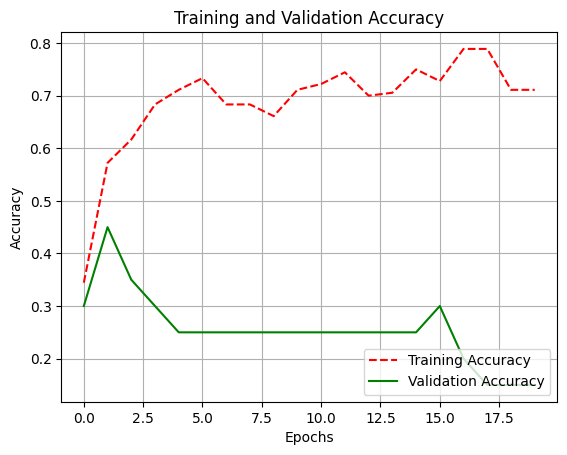

In [25]:
plt.plot(history.history['accuracy'], 'r--', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], 'g-', label='Validation Accuracy')  
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc='lower right')
plt.show()


In [26]:
datagen = ImageDataGenerator(
    rescale=1.0/255,  
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest' 
)

datagen.fit(X_train)


In [27]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

model_1 = Model(inputs=base_model.input, outputs=predictions)

In [28]:
for layer in base_model.layers:
    layer.trainable = False

In [29]:
model_1.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,422,597 (9.24 MB)

 Trainable params: 164,613 (643.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [30]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
history=model_1.fit(X_train, y_train_one_hot, batch_size=16, epochs=30, validation_split = 0.1)

Epoch 1/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 15s 761ms/step - accuracy: 0.2659 - loss: 1.9019 - val_accuracy: 0.7000 - val_loss: 0.7209
Epoch 2/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 431ms/step - accuracy: 0.6388 - loss: 0.8916 - val_accuracy: 0.7000 - val_loss: 0.7212
Epoch 3/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 424ms/step - accuracy: 0.7441 - loss: 0.6619 - val_accuracy: 0.7500 - val_loss: 0.5504
Epoch 4/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 438ms/step - accuracy: 0.8401 - loss: 0.4965 - val_accuracy: 0.7500 - val_loss: 0.6442
Epoch 5/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 437ms/step - accuracy: 0.8754 - loss: 0.3790 - val_accuracy: 0.7500 - val_loss: 0.4841
Epoch 6/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 426ms/step - accuracy: 0.8727 - loss: 0.3636 - val_accuracy: 0.8000 - val_loss: 0.5617
Epoch 7/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 427ms/step - accuracy: 0.9410 - loss: 0.2513 - val_accuracy: 0.7500 - val_loss: 0.5872
Epoch 8/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 432ms/step - accuracy: 0.9416 - loss: 0.2150 - val_accuracy: 0

In [32]:
model_1.evaluate(X_test, y_test_one_hot)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 270ms/step - accuracy: 0.7628 - loss: 0.7367


[0.7114272713661194, 0.7692307829856873]

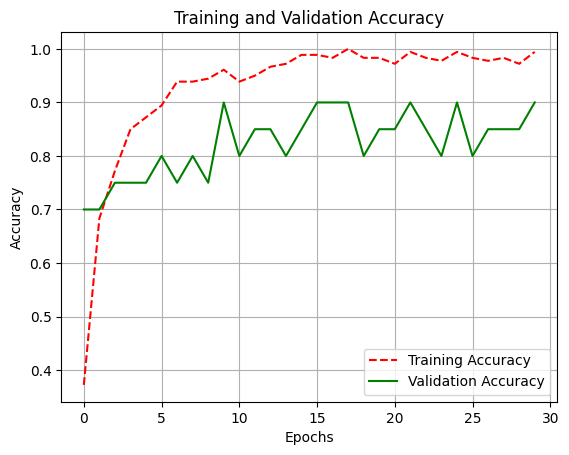

In [33]:
plt.plot(history.history['accuracy'], 'r--', label='Training Accuracy') 
plt.plot(history.history['val_accuracy'], 'g-', label='Validation Accuracy') 
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc='lower right')
plt.show()


In [34]:
model_1.save('models/soilClassification.keras')